In [1]:
import MeCab

In [2]:
mecab = MeCab.Tagger()

In [3]:
def read_mecab(file):
    results = []
    morphs = []
    with open(file, 'r', encoding='utf-8') as f:
        for row in f:
            if row == 'EOS\n':
                if len(morphs):
                    results.append(morphs)
                    morphs = []
            else:
                cols1 = row.split('\t')
                cols2 = cols1[1].split(',')
                morph = {'surface': cols1[0],
                         'base': cols2[6],
                         'pos': cols2[0],
                         'pos1': cols2[1],
                        }
                morphs.append(morph)
    if len(morphs):
        results.append(morphs)
        morphs = []
    return results

results = read_mecab('Data/neko.txt.mecab')
results[:2]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]]

In [4]:
import collections
word_list = []
for morphs in results:
    for i in range(len(morphs)):
        if morphs[i]["pos"] != "補助記号" and morphs[i]["pos"] != "助詞" and morphs[i]["pos"] != "助動詞":
            word_list.append(morphs[i]["surface"])
c = collections.Counter(word_list)
common = c.most_common()

<BarContainer object of 10 artists>

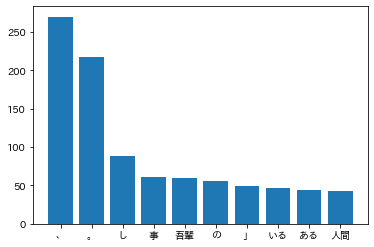

In [7]:
import itertools
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

neko_list = []
for morphs in results:
    text37 = []
    Flag = 0
    for morph in morphs:
        if "猫" in morph["surface"]:
            Flag = 1
            continue
        if morph["pos"] != "補助記号" and morph["pos"] != "助詞" and morph["pos"] != "助動詞":
            text37.append(morph["surface"])
    if Flag == 1:
        neko_list.append(text37)
all_neko = list(itertools.chain.from_iterable(neko_list))
c = collections.Counter(all_neko)
word_list = []
height_list = []
for i in range(10):
    word_list.append(c.most_common()[:10][i][0])
    height_list.append(c.most_common()[:10][i][1])
plt.bar(x = word_list, height = height_list)
